# MUSIC REPRESENTATIONS #
Hey! Let us dive into the music world. After reading the first chapter from the book - **Fundamentals Of Music Processing by Meinard Müller**, it is now time to start implementing the knowledge that you have gained from the book. 



## Notes & Pitch ##

## Question 1 ##

Complete the code for the following function which generates an array of sinusoids for a given list of MIDI pitches and also generates values on time axis in the form of time array. Recall that the MIDI note number is an integer between 0 and 127. MIDI note numbers encode, in increasing order, the musical pitches C0 to G#9. For example, note C4 has the MIDI note number 60, whereas the concert pitch A4 has the MIDI note number 69.

PS- I have used **IPython.display** library as written below, Your task is to find out its function and then comment it down in the code. 


In [1]:
!git clone https://github.com/S-akshii/Automatic-Music-Transcription.git


Cloning into 'Automatic-Music-Transcription'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 64 (delta 27), reused 31 (delta 8), pack-reused 0
Unpacking objects: 100% (64/64), done.


In [2]:
import numpy as np
import IPython.display as ipd    #to create an audio object...When this object is returned by an input cell or passed to the display function, it will result in Audio controls being displayed in the frontend.
import matplotlib.pyplot as plt
 
    
""" Input:
        pitches (list): List of MIDI pitches 
        Duration (in seconds): of each sinusoid 
Returns:
        x (np.ndarray): Signal
        t (np.ndarray): Time axis (in seconds)
"""
        
        
        
    ## COMPLETE THE CODE
def create_sinusoid(pitches =[0],Sampling_rate =100 ,duration =[0.5] , amplitude =1) :
  omega_list = [element * 2*np.pi for element in pitches]
  omega = np.asarray(omega_list)
  t=np.arange(duration*Sampling_rate)/Sampling_rate
  x=[]
  for o in omega :
   y=(np.sin(o*t))*amplitude
   x=np.append(x,y,0)
  return x,t

### Section 1.1 ###

In [5]:

duration = 4 # Set the values on your own so that you get a fascinating ouput
amplitude = 5
Sampling_rate = 10000
pitches = [55,110,220,440,880,1760,3520] # Set the values for [A1,A2,A3,A4,A5,A6,A7]  # Can reset the values to check results for other pitches.
x,t = create_sinusoid(pitches,Sampling_rate,duration,amplitude)
ipd.display(ipd.Audio(data=x, rate=Sampling_rate))

### Section 1.2 ###


![](https://github.com/naiza2000/Automatic-Music-Transcription/blob/main/Task%201/.ipynb_checkpoints/g_major_scale.png?raw=1)
<img src= "g_major_scale.png" width= "350"/> 


In order to describe music using a finite number of symbols, one needs to discretize the space of all possible pitches. This leads to the notion of a musical scale, which can be thought of as a finite set of representative pitches.
Generate G major and G minor scale using the above **create_sinusoid** function.

In [6]:
#Section 1.2 code
duration = 2
amplitude = 5
Sampling_rate=8000
pitches=[392.00,440.00,493.88,523.25,587.33,659.25,739.99]
x,t = create_sinusoid(pitches,Sampling_rate,duration,amplitude)
ipd.display(ipd.Audio(data=x, rate=Sampling_rate))

In [7]:
duration = 2
amplitude = 5
Sampling_rate=8000
pitches=[392.00,440.00,466.16,523.25,587.33,622.25,698.46,783.99]
x,t = create_sinusoid(pitches,Sampling_rate,duration,amplitude)
ipd.display(ipd.Audio(data=x, rate=Sampling_rate))

### Section 1.3 ###
### "HAPPY BIRTHDAYY TO YOUUU...HAPPYY BIRTHDAYYY TOO YOUUU.........." ###

We always wanted to sing **Happy Birthday** song on our parents', friends' birthday events. Guess what? Now you can definitely do that - without using guitar/piano/any instrument - no matter how ugly you sing - by just writing a few lines of code. Well, you will definitely become a rockstart if you are able to do this...
Hint : Use the same function as above, and you will succeed. 

PS - Those who have not played any musical instrument before should search for the paino notes of the **Happy Birthday** song..


In [8]:
# Section 1.3 code
duration= 0.7
amplitude = 3
Sampling_rate = 40000
pitches = [264,297,264,352,330,330,264,297,264,396,352,264,440,352,330,297,466,440,352,396,352]
x,t = create_sinusoid(pitches,Sampling_rate,duration,amplitude)
ipd.display(ipd.Audio(data=x, rate=Sampling_rate))

## Piano Roll Representation ##
As defined in the book, a piano-roll representation is understood to be a geometric visualization of the note information as specified by a piano roll. The horizontal axis of this two-dimensional representation encodes time, whereas the vertical axis encodes pitch. Every note is described by an axis-parallel rectangle coding three parameters. The first parameter is the onset time, given by the leftmost horizontal coordinate of the rectangle, and the second is the pitch, given by the lower vertical coordinate of the rectangle. Finally, the third parameter is the duration of the note, encoded by the width of the rectangle.

The major task of our project is to be successfully able to pre-process the audio file containing instrumental music and create transcription for the same. Now, Piano roll representation is a very important form of music representation which you must have studied from the book. 
In order to help you get a visualization for the same, here is a video clipping which will help you realise how beautiful this representation is. 


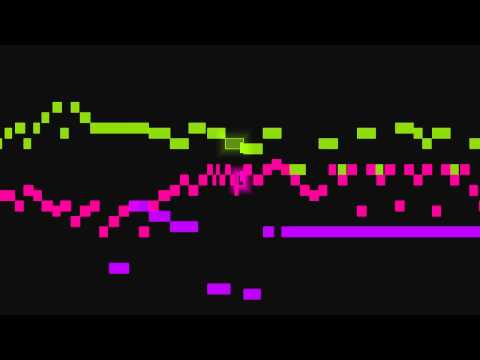

In [ ]:
ipd.display(ipd.YouTubeVideo('ddbxFi3-UO4', start=1))

As you can see from the above video, there are many instruments which are being played at the same time - which are represented by different colors respectively. Such kind of music is called **POLYPHONIC**. It becomes difficult to do automatic transcription of this music type since it is hard to keep track of which note was played by which instrument. This is one of the major challenges that we will have to see during the implementation of our project.

## Question 2 ##

In the given CSV file, each note event corresponds to a line encoding a data record consisting of the four parameters start, duration, pitch, velocity, and label. The first four parameters are real numbers and encode the start, duration, pitch (encoded as MIDI note number), and velocity (in the range between 0.0 and 1.0) of a note event. The last parameter label is a string that my encode further information such as the instrument (e.g. violin, guitar, flute), or some staff information (e.g. left/right hand for a piano score).



In [ ]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
import pandas as pd
import IPython.display as ipd

with open('MUSIC_notes.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        csv_str = file.read()
print(csv_str)

0.25,0.23,67,1,Right Hand
0.25,0.23,55,1,Right Hand
0.25,0.23,43,1,Left Hand
0.5,0.23,67,1,Right Hand
0.5,0.23,55,1,Right Hand
0.5,0.23,43,1,Left Hand
0.75,0.23,67,1,Right Hand
0.75,0.23,55,1,Right Hand
0.75,0.23,43,1,Left Hand
1,0.97,63,1,Right Hand
1,0.97,51,1,Right Hand
1,0.97,39,1,Left Hand
2.25,0.23,65,1,Right Hand
2.25,0.23,53,1,Right Hand
2.25,0.23,41,1,Left Hand
2.5,0.23,65,1,Right Hand
2.5,0.23,53,1,Right Hand
2.5,0.23,41,1,Left Hand
2.75,0.23,65,1,Right Hand
2.75,0.23,53,1,Right Hand
2.75,0.23,41,1,Left Hand
3,1.97,62,1,Right Hand
3,1.97,50,1,Left Hand
3,1.97,38,1,Left Hand



The note events stored in the CSV file can be visualized using a **piano-roll representation**. Complete the following function to illustrate how this may be done.

You can use Pandas library for better visualization. You are free to use as many libraries as you want. You might not be aware of powers of python which you will might have to use to do this question, but you can always google and learn them as per your requirements. :)

The final output should look like this :
    

<img src="https://github.com/naiza2000/Automatic-Music-Transcription/blob/main/Task%201/.ipynb_checkpoints/piano.png?raw=1" width="600"/>


In [ ]:
def convert_to_piano_roll():
    # complete the function
    # You can create more functions, if you need to.
    

## PrettyMIDI ##

MIDI is another important music transcription. **[PrettyMIDI](https://github.com/craffel/pretty-midi)** is an important Python library for MIDI visualization, manipulation and interpretation. Read more about this library since it will be very useful for our project. 


## Question 3 ##

Download any MIDI file from the internet and copy it to the same directory as that of this notebook. 
Dig deeper into PrettyMIDI and try to visualise the MIDI file in a form of table consisting of easy to understand notes events. Basically, you will have to convert the standard MIDI data into a standard python list using PrettyMIDI and display the events in the form of table with each event described by the parameters : Start, End, Pitch, Velocity and the Instrument. You can show the final output using Pandas Dataframe as well. 


In [9]:
!pip install pretty_midi

     |████████████████████████████████| 5.6MB 5.3MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-cp37-none-any.whl size=5591958 sha256=75eb43beedf3f2d51a8e9f4811c27fdc9f35ed9724c32f391304ae69d3c31acf
  Stored in directory: /root/.cache/pip/wheels/4c/a1/c6/b5697841db1112c6e5866d75a6b6bf1bef73b874782556ba66
Successfully built pretty-midi


In [10]:
## QUESTION 3 IS SUPPOSED TO BE DONE HERE
import pretty_midi
import numpy as np
import pandas as pd
def make_note_list(midi_file):
  midi_data = pretty_midi.PrettyMIDI(midi_file)
  notes = []
  for instrument in midi_data.instruments:
    for note in instrument.notes:
      temp = [note.start, note.end, note.pitch, note.velocity, instrument.name]
      notes.append(temp)
  df = pd.DataFrame(notes, columns=["Start", "End", "Pitch", "Velocity", "Instrument"])
  return df
data = make_note_list("/content/Automatic-Music-Transcription/Task 1/Luis Fonsi ft. Daddy Yankee - Despacito  (midi by Carlo Prato) (www.cprato.com).mid")
print(data)

     Start     End  Pitch  Velocity Instrument
0     1.00   1.500     74       100      Voice
1     1.50   2.000     73       100      Voice
2     2.00   2.250     71       100      Voice
3     2.25   2.500     66       100      Voice
4     2.50   2.625     66       100      Voice
..     ...     ...    ...       ...        ...
425  33.25  33.500     42       100      Drums
426  33.75  34.000     42       100      Drums
427  34.00  34.250     36       100      Drums
428  34.00  34.250     35       100      Drums
429  34.00  34.250     49       100      Drums

[430 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/pretty_midi/pretty_midi.py:101: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


These questions might be difficult for you, considering you have no Python experience. But it is the time to finally learn this language properly. You do not need to do brain storming in any question since these questions demand simple implementation of whatever you have learnt in the chapter 1 of music representations. 
So, with little efforts, you can easily solve the assignment. ALL THE BEST!
In case you have any doubts, feel free to discuss on Discord channel. 